In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('../data/az_deaths.csv') 

df.head()


,ML Number,Name,Sex,Age,Reporting Date,Surface Management,Location,Location Precision,Corridor Code,Corridor,...,OME Determined COD,Condition Code,Body Condition,Post Mortem Interval,State,County,Latitude,Longitude,UTM X,UTM Y
0,00-00097,Unidentified,male,NaN,2000-01-10,Cocopah Indian Reservation,NaN,"physical description with directions, distance...",12,Yuma,...,UNDETERMINED - MUMMIFIED AND SKELETAL REMAINS,4.0,Skeletonization w/ mummification,< 5 weeks,Arizona,YUMA,32.589668,-114.799807,143294,3612175
1,00-00148,"Nicolas, Tomas",male,17.0,2000-01-22,State of Arizona,NaN,"physical description with directions, distance...",4,Patagonia,...,HYPOTHERMIA,1.0,Fully fleshed,< 1 day,Arizona,PIMA,31.812406,-110.483205,548914,3519758
2,00-00189,Unidentified,male,NaN,2000-01-20,US Forest Service,NaN,"physical description with directions, distance...",5,Nogales,...,UNDETERMINED - SKELETAL REMAINS,7.0,Complete skeletonization w/ bone degradation,> 6-8 months,Arizona,SANTA CRUZ,31.568000,-111.151300,485643,3492563
3,00-00222,Unidentified,male,NaN,2000-01-10,Private,NaN,"physical description with directions, distance...",9,Ajo,...,UNDETERMINED - SKELETAL REMAINS,6.0,Complete skeletonization w/ disarticulation,< 6-8 months,Arizona,PIMA,32.355997,-112.826855,328102,3581363
4,00-00245,"Candia-Bravo, Maria Del Rocio",female,20.0,2000-02-05,Tohono Oodham Nation,NaN,"physical description with directions, distance...",7,San Miguel,...,MULTIPLE BLUNT FORCE INJURIES,1.0,Fully fleshed,< 1 day,Arizona,PIMA,31.717790,-111.779830,426116,3509419


Narrow down by the conditions I want to have to see the frequency of female remains found at the border, so I'm only going to extract 'ML Number,' 'Sex,' and  'Reporting Date' 

In [25]:
df = df[['ML Number', 'Sex', 'Reporting Date']]
df

,ML Number,Sex,Reporting Date
0,00-00097,male,2000-01-10
1,00-00148,male,2000-01-22
2,00-00189,male,2000-01-20
3,00-00222,male,2000-01-10
4,00-00245,female,2000-02-05
...,...,...,...
4295,MC94-0426,undetermined,1994-02-09
4296,MC95-2314,male,1995-08-15
4297,MC95-2315,male,1995-08-15
4298,MC96-0604,male,1996-02-27


Set to date time so the code is read as a date in the graph, then group by 'Reporting Date' column.

In [28]:
df['Reporting Date'] = pd.to_datetime(df['Reporting Date'])
df['Reporting Date']

0      2000-01-10
1      2000-01-22
2      2000-01-20
3      2000-01-10
4      2000-02-05
          ...    
4295   1994-02-09
4296   1995-08-15
4297   1995-08-15
4298   1996-02-27
4299   1999-11-07
Name: Reporting Date, Length: 4300, dtype: datetime64[ns]

Then I filter by query to narrow by female

In [29]:
df_fm = df.query("Sex == 'female'")

In [30]:
df_fm

,ML Number,Sex,Reporting Date
4,00-00245,female,2000-02-05
5,00-00246,female,2000-02-05
6,00-00247,female,2000-02-05
9,00-00401,female,2000-02-29
22,00-00816,female,2000-05-09
...,...,...,...
4101,MC01-3586,female,2001-11-10
4128,MC04-2805,female,2004-08-08
4129,MC04-2806,female,2004-08-08
4154,MC08-4165,female,2008-07-11


In [41]:
df_fm.to_csv("../output/az_female_deaths.csv")


In [42]:
type(df_fm)

pandas.core.frame.DataFrame

Set to ascending to have it in chronological order and then reset index by date

In [43]:
df_dates = df_fm.sort_values(by='Reporting Date', ascending = True)

In [44]:
df_deaths = df_dates.set_index('Reporting Date')
df_deaths.head()

,ML Number,Sex
Reporting Date,,
1982-05-14,MC82-0945,female
1997-02-08,97-00254,female
1999-01-04,99-00034,female
2000-02-05,00-00245,female
2000-02-05,00-00247,female


Use .resample()["ML Number"].count() to resample your data


In [45]:
df_resample = df_deaths.resample('ME').count()
df_resample.head()

,ML Number,Sex
Reporting Date,,
1982-05-31,1,1
1982-06-30,0,0
1982-07-31,0,0
1982-08-31,0,0
1982-09-30,0,0


In [46]:
df_resample.sample(n=5)

,ML Number,Sex
Reporting Date,,
1999-02-28,0,0
1989-02-28,0,0
1996-04-30,0,0
2002-09-30,5,5
1988-02-29,0,0


Store it in 'female_deaths' and plot it

In [47]:
female_deaths = df_resample['Sex']
female_deaths.head()

Reporting Date
1982-05-31    1
1982-06-30    0
1982-07-31    0
1982-08-31    0
1982-09-30    0
Freq: ME, Name: Sex, dtype: int64

Text(0, 0.5, 'Remains Found')

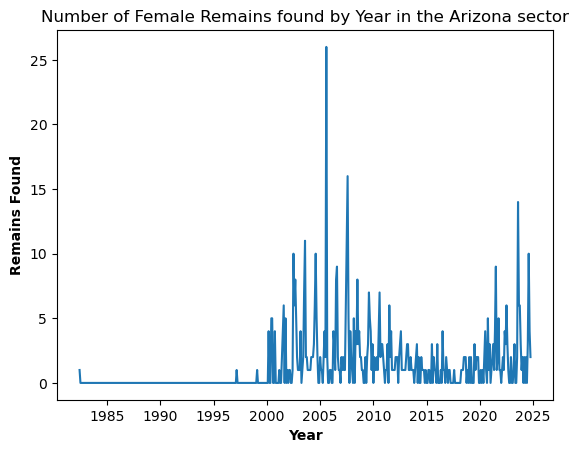

In [48]:
fig, ax = plt.subplots()
ax.plot(female_deaths)
plt.title("Number of Female Remains found by Year in the Arizona sector")
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Remains Found', fontweight='bold')

Save graph to output folder

In [51]:
fig.savefig('../output/az_female_deaths.jpg', dpi=100, bbox_inches='tight')
